<a href="https://colab.research.google.com/github/billiahkerubo1/Data-Science-Portfolio/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt
import nltk
import random

In [ ]:
encoding_list = ['ascii', 'big5', 'big5hkscs', 'cp037', 'cp273', 'cp424', 'cp437', 'cp500', 'cp720', 'cp737'
                 , 'cp775', 'cp850', 'cp852', 'cp855', 'cp856', 'cp857', 'cp858', 'cp860', 'cp861', 'cp862'
                 , 'cp863', 'cp864', 'cp865', 'cp866', 'cp869', 'cp874', 'cp875', 'cp932', 'cp949', 'cp950'
                 , 'cp1006', 'cp1026', 'cp1125', 'cp1140', 'cp1250', 'cp1251', 'cp1252', 'cp1253', 'cp1254'
                 , 'cp1255', 'cp1256', 'cp1257', 'cp1258', 'euc_jp', 'euc_jis_2004', 'euc_jisx0213', 'euc_kr'
                 , 'gb2312', 'gbk', 'gb18030', 'hz', 'iso2022_jp', 'iso2022_jp_1', 'iso2022_jp_2'
                 , 'iso2022_jp_2004', 'iso2022_jp_3', 'iso2022_jp_ext', 'iso2022_kr', 'latin_1', 'iso8859_2'
                 , 'iso8859_3', 'iso8859_4', 'iso8859_5', 'iso8859_6', 'iso8859_7', 'iso8859_8', 'iso8859_9'
                 , 'iso8859_10', 'iso8859_11', 'iso8859_13', 'iso8859_14', 'iso8859_15', 'iso8859_16', 'johab'
                 , 'koi8_r', 'koi8_t', 'koi8_u', 'kz1048', 'mac_cyrillic', 'mac_greek', 'mac_iceland', 'mac_latin2'
                 , 'mac_roman', 'mac_turkish', 'ptcp154', 'shift_jis', 'shift_jis_2004', 'shift_jisx0213', 'utf_32'
                 , 'utf_32_be', 'utf_32_le', 'utf_16', 'utf_16_be', 'utf_16_le', 'utf_7', 'utf_8', 'utf_8_sig']

for encoding in encoding_list:
    worked = True
    try:
        df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding=encoding, nrows=5)
    except:
        worked = False
    if worked:
        print(encoding, ':\n', df.head())

cp437 :
    0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....  

In [ ]:
# Preview the shape of data
#
df.shape

(5, 6)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from pprint import pprint
nltk.download('punkt')
nltk.download('all')
text = """
                                                                  
    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....                                                                   
4                      @Kwesidei not the whole crew  """
pprint(nltk.word_tokenize(text), width=79, compact=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]   

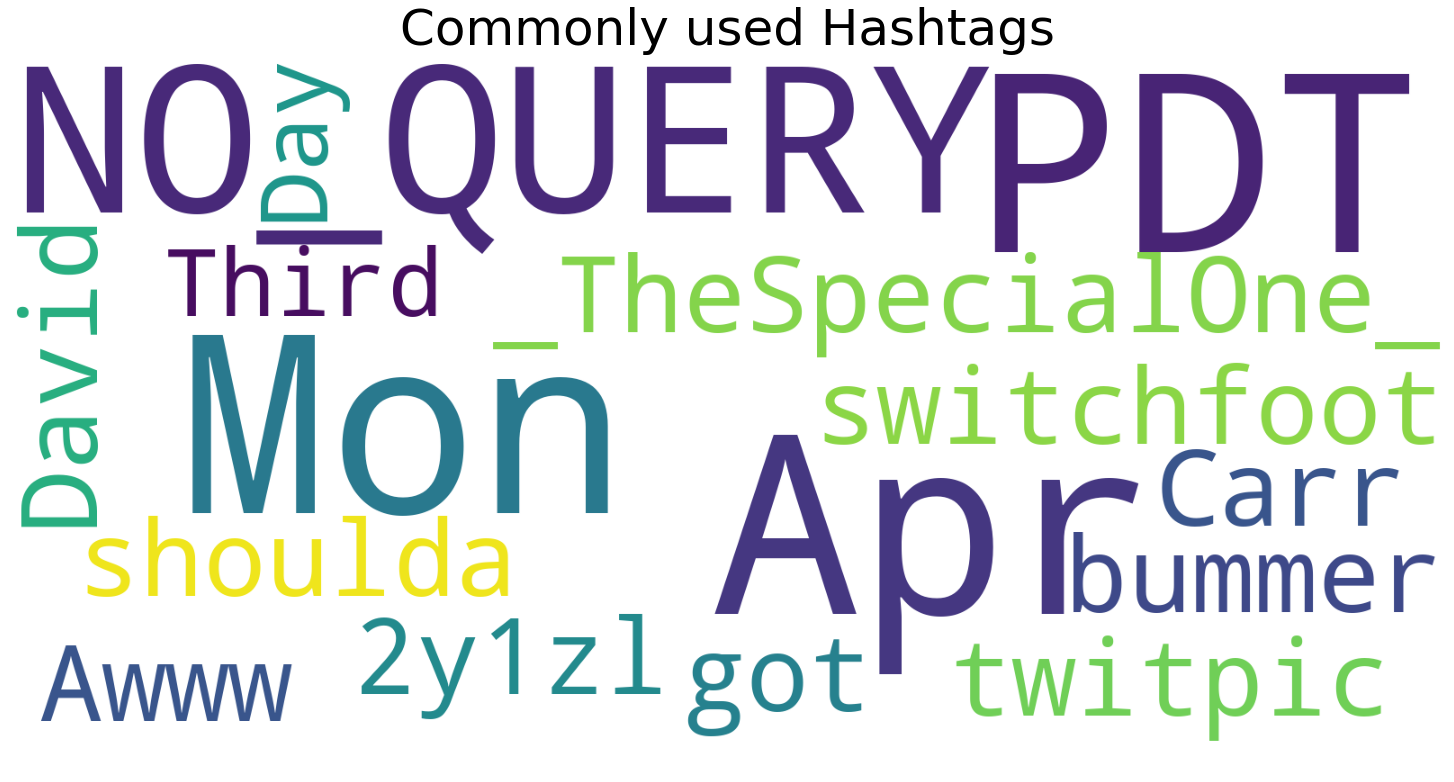

In [ ]:
# Mostly used hashtags in a word cloud
#
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc2 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, 
        background_color="#ffffff").generate(" ".join(df))
plt.imshow(wc2)
plt.axis('off')
plt.title('Commonly used Hashtags', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("my whole body feels itchy and like its on fire ")

{'compound': -0.25, 'neg': 0.321, 'neu': 0.5, 'pos': 0.179}

In [ ]:
tweets = [t.replace("://", "//") for t in nltk.corpus.twitter_samples.strings()]

In [ ]:
# Classifying tweets
from random import shuffle

def is_positive(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia.polarity_scores(tweet)["compound"] > 0

shuffle(tweets)
for tweet in tweets[:10]:
    print(">", is_positive(tweet), tweet)

> True @SpazzyTsukihara link plz :p
> False RT @thomasmessenger: For all Tories claiming that Labour overspent and thus caused a global financial crisis, ahem... http//t.co/DkLwCwzhDA
> True RT @jakeblackhurst: Nothing as depressing as a young Tory. It's like you've bypassed the first 50 years of you're life
> True RT @BBCJamesCook: Ed Miliband says he'd rather not have a Labour government than do a "confidence and supply" deal with the SNP. #GE2015
> True RT @OddMiliband: Ed Miliband laughing http//t.co/0ztYD3lJi6
> False @SensodyneIndia I loved it but this #ToothSensitivity :-(
> False RT @Joey7Barton: Do one Clegg... 👊
> False RT @GAPonsonby: Just in case @BBCRadioScot's news gatherers miss the SNP press release. Here it is. @BBCGaryR http//t.co/CMvY5JF8Eo
> True Ed Miliband's voice is hilarious
> False RT @Elin_A_Roberts: "I challenged Miliband to hold an emergency budget to reverse Tory cuts in the next Parliament. He dismissed that." #Pl…
